 # **Building a model for the "_Client subscription for term deposit plan_"**

## **Importing Libraries**

In [1]:
import pandas as pd                   # Library to  work with data frames in load the data files.
import numpy as np                    # Numeric python library
import seaborn as sns                 # library for data visulization
import matplotlib.ticker as mtick     
import matplotlib.pyplot as plt       # library for data visualization
plt.show()
%matplotlib inline                 
import warnings
warnings

<module 'warnings' from 'C:\\Users\\Lenovo\\anaconda3\\lib\\warnings.py'>

## Exploratory Data Analysis

In [2]:
bank=pd.read_csv("Bank full.csv")    # Reading the file
bank.head(10)                        # Print first 10 rows of the dataset

age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
5  unknown    5   may       139         1     -1         0  unknown  no  
6  unknown    5   may       217         1     -1         0  unknown  no  
7  unknown    5   may       380         1     -1         0  unknown  no  
8  unknown    5   may        50         1     -1         0  unknown  no  
9  unknown    5   may        55         1     -1         0  unknown  no

In [3]:
bank.tail()                        # Print last 10 rows of the dataset

age           job   marital  education default  balance housing loan  \
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no

In [4]:
bank.shape                       #Find the size or shape of the dataset

(45211, 17)

**Initially we have 45211 rows and 17 columns**

In [5]:
bank.columns.values              #Print the total columns name

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

In [6]:
bank.describe()                 #Distcriptive Statistics of numeric columns

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [7]:
bank.info()                 #Describe the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**We have 7 features of int data type and 10 of object data types and no columns has null values**

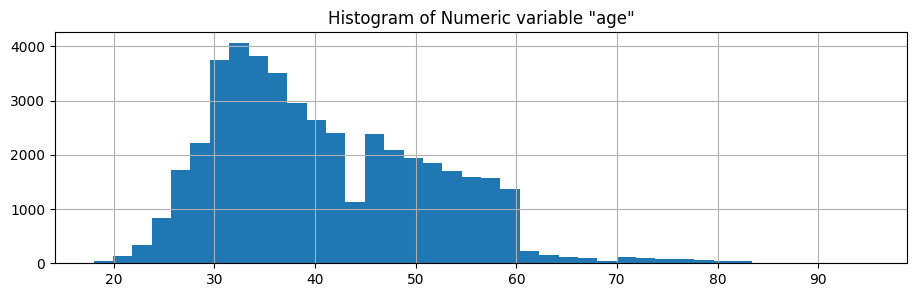

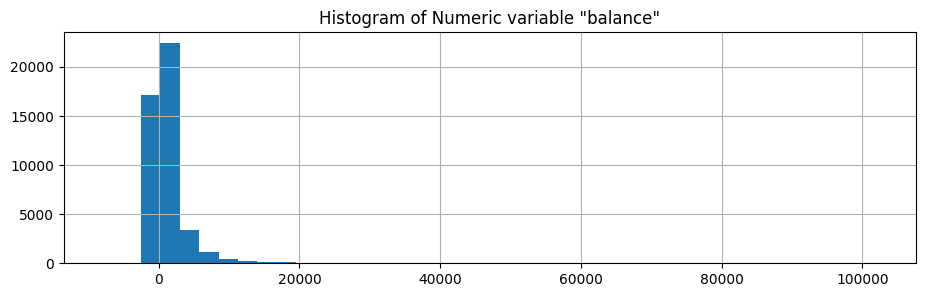

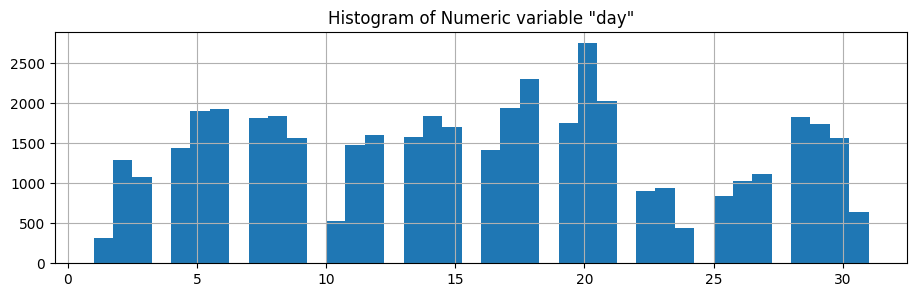

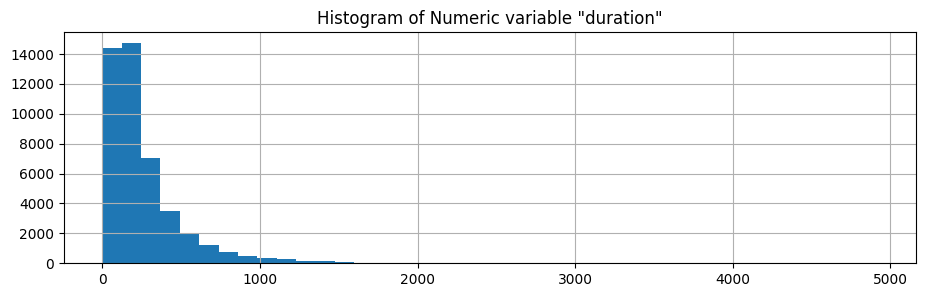

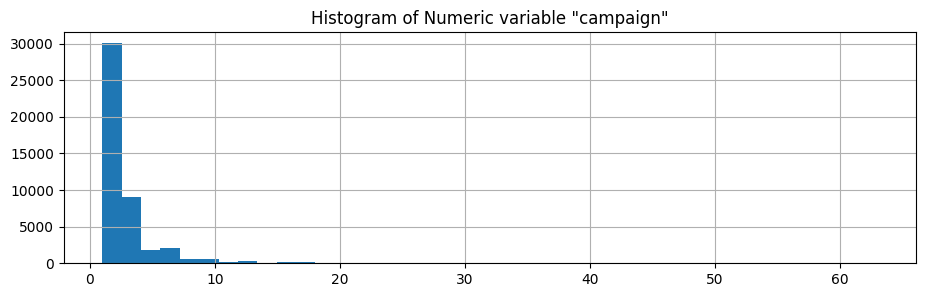

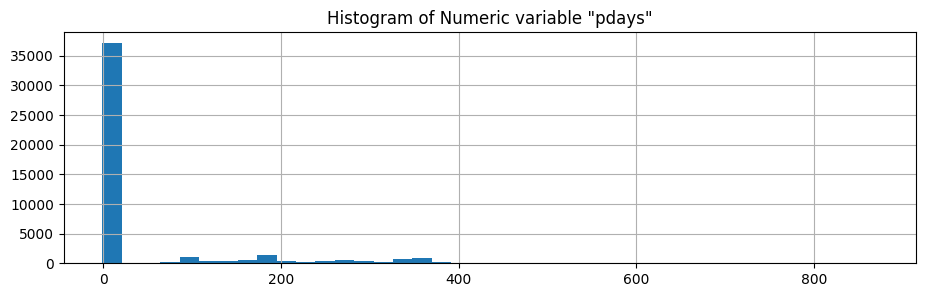

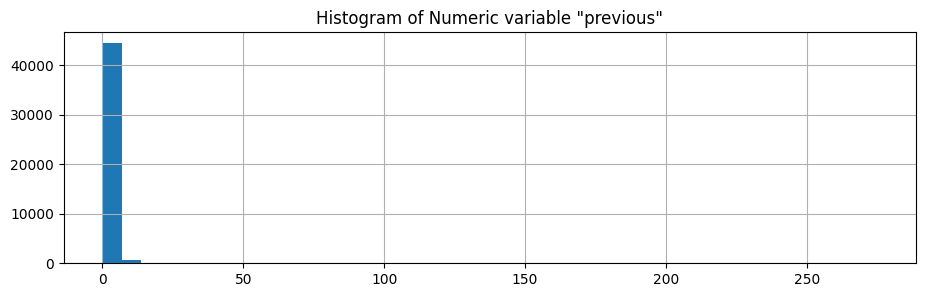

In [8]:
for i,j in enumerate(['age','balance','day','duration','campaign','pdays','previous']):
    plt.figure(i,figsize=(11, 3), dpi=100, facecolor='white', edgecolor='none')
    plt.title(f"Histogram of Numeric variable \"{j}\"")
    bank[j].hist(bins=40,histtype='bar')
#bank['age'].hist(bins=40, figsize=(8,4))
#bank['balance'].hist(bins=40, figsize=(8,4))

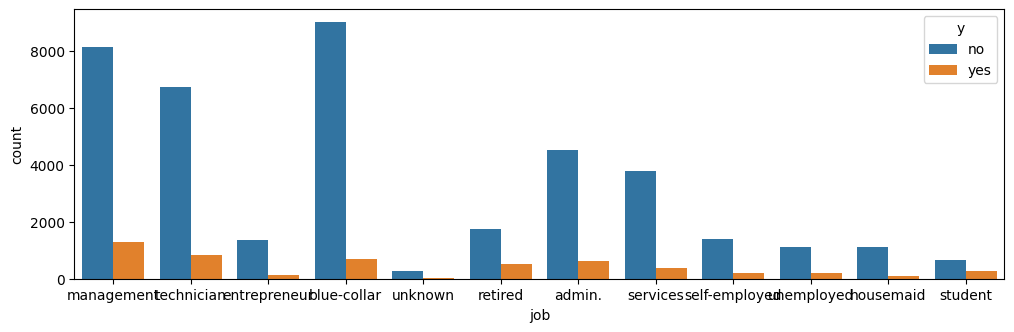

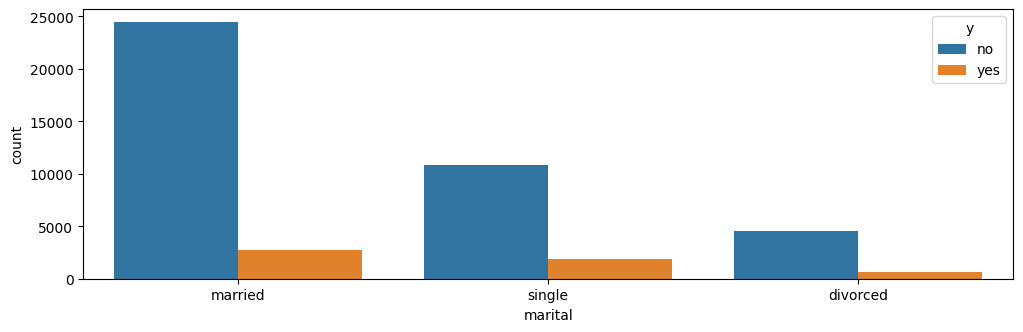

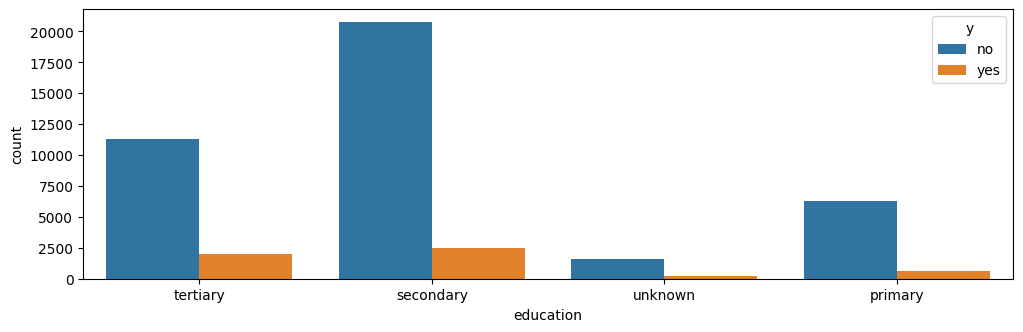

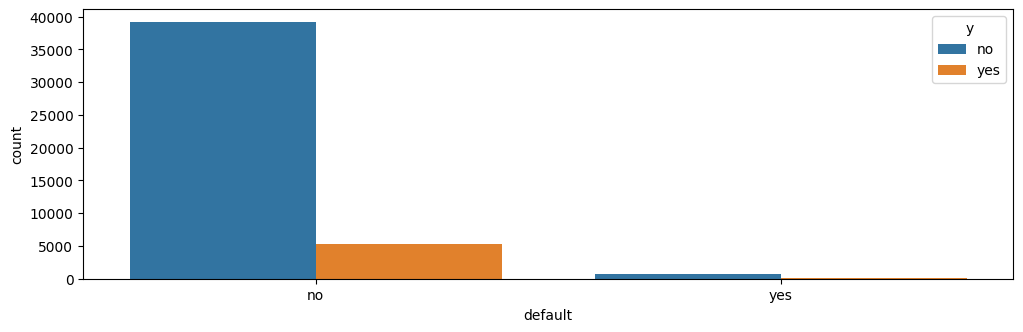

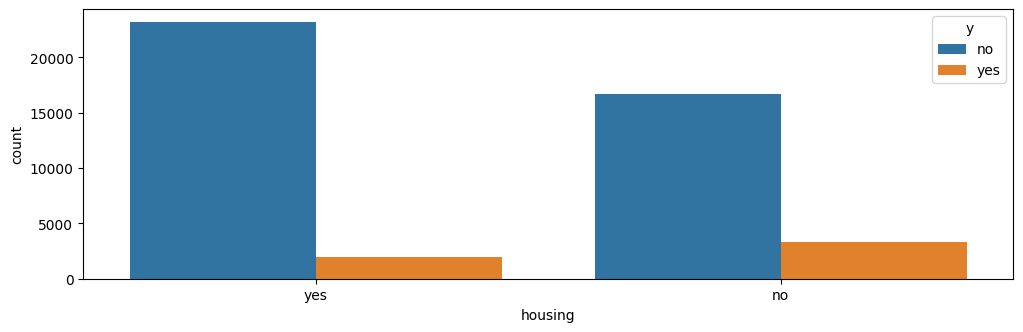

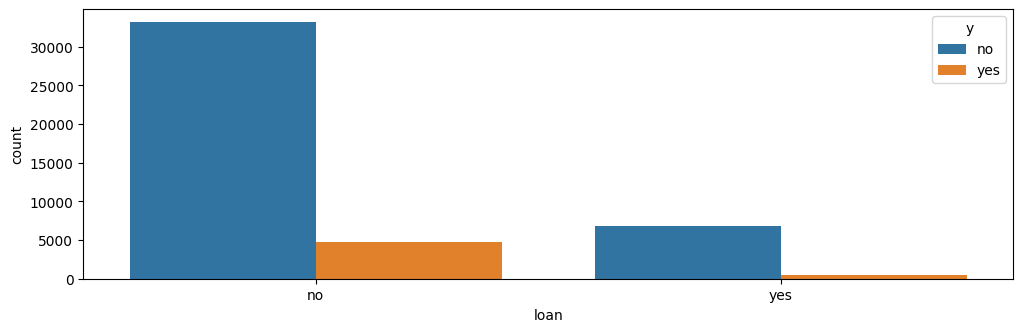

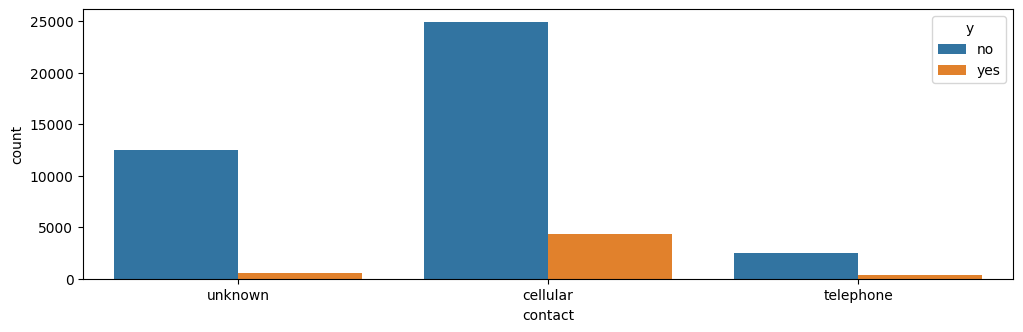

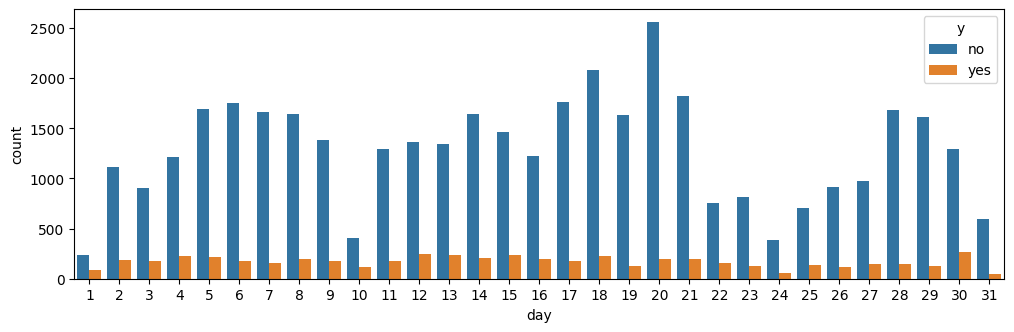

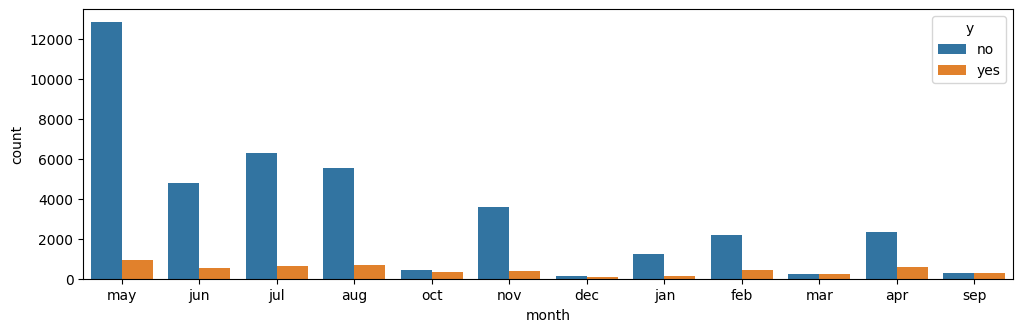

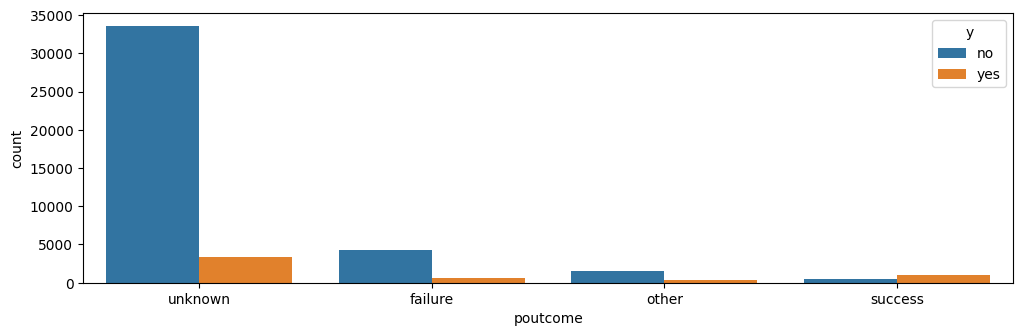

In [9]:
for i,predictor in enumerate(bank.drop(columns=['y','age','campaign','previous', 'balance', 'duration','pdays'])):
    plt.figure(i,figsize=(12, 3.5), dpi=100, facecolor='white', edgecolor='none')
    sns.countplot(data=bank, x=predictor, hue='y')

In [10]:
#!pip install ydata_profiling
from ydata_profiling import ProfileReport

In [11]:
ProfileReport(bank)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
bank.duplicated().sum()          #For finding the duplicate values

0

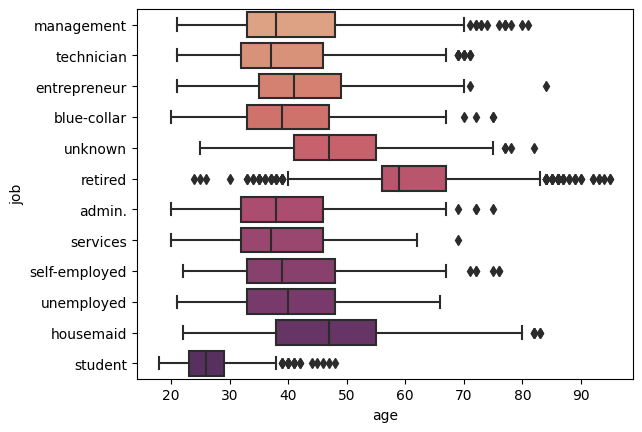

In [13]:
sns.boxplot(bank,x=bank['age'],y=bank['job'],palette='flare')
plt.show()

<AxesSubplot: xlabel='age', ylabel='job'>

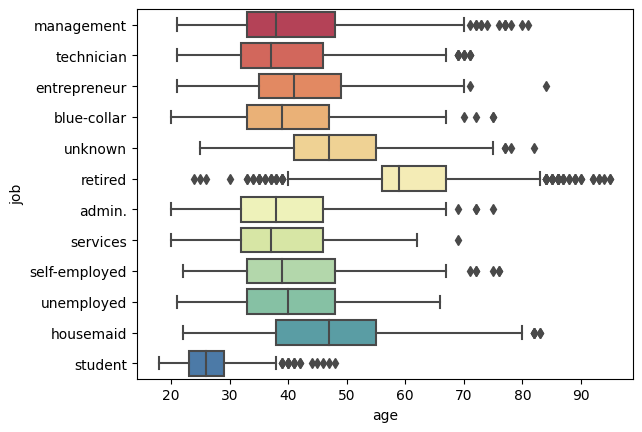

In [14]:
sns.boxplot(bank,x=bank['age'],y=bank['job'],palette='Spectral')

**No duplicate values in given dataset**

In [15]:
bank['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [16]:
100*bank['y'].value_counts()/len(bank['y'])

no     88.30152
yes    11.69848
Name: y, dtype: float64

<AxesSubplot: xlabel='y', ylabel='count'>

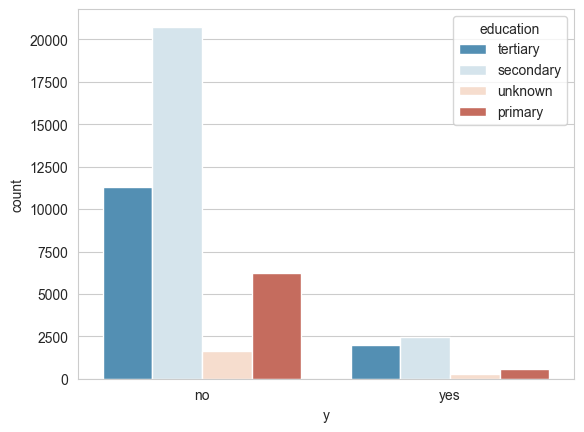

In [17]:
plt.figure
sns.set_style('whitegrid')
sns.countplot(x='y',hue='education',data=bank,palette='RdBu_r')    # Bar Plot

<AxesSubplot: xlabel='y', ylabel='count'>

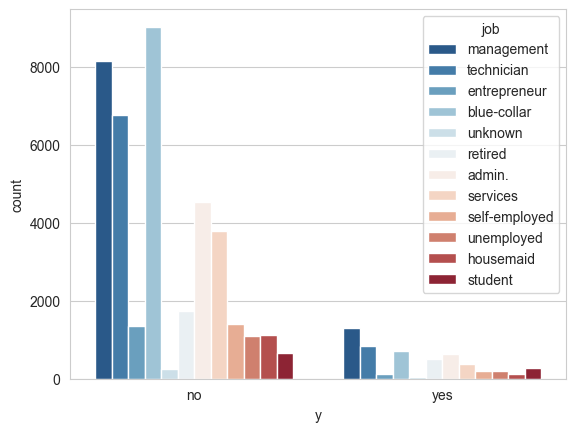

In [18]:
plt.figure
sns.set_style('whitegrid')
sns.countplot(x='y',hue='job',data=bank,palette='RdBu_r')    # Bar Plot

- **The term deposit data shows high variation 88.30% are no and 11.69% are yes. Data is highly imbalanced, ratio = 88:12. So we'll analyse the data with other features while taking the target values separately to get some insights.**

**We'll copy the data in another dataframe to avoid data loss of orignal data.** 

In [19]:
bank1 = bank.copy()          # This is deep copy of the data. That means if we change in bank1 data it will not reflect in bank data.

In [20]:
bank1.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

# **Data Cleaning**

We can drop 'day' & 'month' columns as 'pdays' gives the number of days that passed by after the client was last contacted from a previous campaign

In [21]:
bank1.drop(["day","month"],axis =1, inplace = True)

There are many unknown entries we need to replace them as null/Nan

In [22]:
for i in bank1.columns:
    bank1[i] = np.where(bank1[i] == "unknown", np.nan, bank1[i])
bank1.isna().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [23]:
(36959/bank1.poutcome.shape[0])*100

81.74780473778506

After replacing unknown values as null we find 'poutcome' has 3705 null entries i.e. about 81.74% null values, this feature is of no need we can simply drop it.

In [24]:
(13020/bank1.contact.shape[0])*100

28.798301298356595

Similarly it doesnt matter if 'contact' was through cellular or telephone it doesnt affect the target variable, so we can drop this feature

In [25]:
bank1.drop("poutcome", inplace = True, axis = 1)

In [26]:
bank1.drop("contact", inplace = True, axis = 1)

As 'job' & 'education' has lower null values we'll fill  them using fillna method instead of dropping

In [27]:
bank1["job"].fillna(method = "ffill",inplace=True)

In [28]:
bank1["education"].fillna(method = "ffill",inplace= True)
#ffill: propagate last valid observation forward to next valid.

Now we need to convert all categorical data to numerical data. This will allow us to perform calculations on our data

I decided to replace yes and no as 1 & 0 respectively, by defining  a map function including the target variable

In [29]:
varlist=['default','housing','loan','y']

In [30]:
def binary_map(q):
    return q.map({'yes':1,'no':0})

In [31]:
bank1[varlist]=bank1[varlist].apply(binary_map)

In [32]:
bank1.head()

age           job  marital  education  default  balance  housing  loan  \
0  58.0    management  married   tertiary        0   2143.0        1     0   
1  44.0    technician   single  secondary        0     29.0        1     0   
2  33.0  entrepreneur  married  secondary        0      2.0        1     1   
3  47.0   blue-collar  married  secondary        0   1506.0        1     0   
4  33.0   blue-collar   single  secondary        0      1.0        0     0   

   duration  campaign  pdays  previous  y  
0     261.0       1.0   -1.0       0.0  0  
1     151.0       1.0   -1.0       0.0  0  
2      76.0       1.0   -1.0       0.0  0  
3      92.0       1.0   -1.0       0.0  0  
4     198.0       1.0   -1.0       0.0  0

# **One Hot Encoder**

 Now I dont think of using label encoding for the features 'job', 'marital' & 'education'  as it is only recommended for target variable instead we can use the One Hot Encoder  and dummy variables

In [33]:
from sklearn.preprocessing import OneHotEncoder

In [34]:
one = OneHotEncoder()
bank1[list(bank1["job"].unique())] = one.fit_transform(bank1[["job"]]).A

In [35]:
bank1.drop("job",axis = 1, inplace = True)
bank1

age   marital  education  default  balance  housing  loan  duration  \
0      58.0   married   tertiary        0   2143.0        1     0     261.0   
1      44.0    single  secondary        0     29.0        1     0     151.0   
2      33.0   married  secondary        0      2.0        1     1      76.0   
3      47.0   married  secondary        0   1506.0        1     0      92.0   
4      33.0    single  secondary        0      1.0        0     0     198.0   
...     ...       ...        ...      ...      ...      ...   ...       ...   
45206  51.0   married   tertiary        0    825.0        0     0     977.0   
45207  71.0  divorced    primary        0   1729.0        0     0     456.0   
45208  72.0   married  secondary        0   5715.0        0     0    1127.0   
45209  57.0   married  secondary        0    668.0        0     0     508.0   
45210  37.0   married  secondary        0   2971.0        0     0     361.0   

       campaign  pdays  ...  technician  entrepreneur  blue-collar  retired  \
0           1.0   -1.0  ...         0.0           0.0          0.0      1.0   
1           1.0   -1.0  ...         0.0           0.0          0.0      0.0   
2           1.0   -1.0  ...         0.0           1.0          0.0      0.0   
3           1.0   -1.0  ...         1.0           0.0          0.0      0.0   
4           1.0   -1.0  ...         1.0           0.0          0.0      0.0   
...         ...    ...  ...         ...           ...          ...      ...   
45206       3.0   -1.0  ...         0.0           0.0          0.0      0.0   
45207       2.0   -1.0  ...         0.0           0.0          0.0      0.0   
45208       5.0  184.0  ...         0.0           0.0          0.0      0.0   
45209       4.0   -1.0  ...         1.0           0.0          0.0      0.0   
45210       2.0  188.0  ...         0.0           1.0          0.0      0.0   

       admin.  services  self-employed  unemployed  housemaid  student  
0         0.0       0.0            0.0         0.0        0.0      0.0  
1         0.0       0.0            0.0         0.0        1.0      0.0  
2         0.0       0.0            0.0         0.0        0.0      0.0  
3         0.0       0.0            0.0         0.0        0.0      0.0  
4         0.0       0.0            0.0         0.0        0.0      0.0  
...       ...       ...            ...         ...        ...      ...  
45206     0.0       0.0            0.0         0.0        1.0      0.0  
45207     1.0       0.0            0.0         0.0        0.0      0.0  
45208     1.0       0.0            0.0         0.0        0.0      0.0  
45209     0.0       0.0            0.0         0.0        0.0      0.0  
45210     0.0       0.0            0.0         0.0        0.0      0.0  

[45211 rows x 23 columns]

In [36]:
edu=pd.get_dummies(bank1['education'])
edu

primary  secondary  tertiary
0            0          0         1
1            0          1         0
2            0          1         0
3            0          1         0
4            0          1         0
...        ...        ...       ...
45206        0          0         1
45207        1          0         0
45208        0          1         0
45209        0          1         0
45210        0          1         0

[45211 rows x 3 columns]

In [37]:
edu=pd.get_dummies(bank1['education'],drop_first=True)

we can drop the primary column as it can be predicted with the help of other dummy variables

In [38]:
status=pd.get_dummies(bank1['marital'])

In [39]:
status

divorced  married  single
0             0        1       0
1             0        0       1
2             0        1       0
3             0        1       0
4             0        0       1
...         ...      ...     ...
45206         0        1       0
45207         1        0       0
45208         0        1       0
45209         0        1       0
45210         0        1       0

[45211 rows x 3 columns]

In [40]:
status=pd.get_dummies(bank1['marital'],drop_first=True)

In [41]:
status

married  single
0            1       0
1            0       1
2            1       0
3            1       0
4            0       1
...        ...     ...
45206        1       0
45207        0       0
45208        1       0
45209        1       0
45210        1       0

[45211 rows x 2 columns]

In [42]:
bank1=pd.concat([bank1,edu,status],axis=1)
bank1

age   marital  education  default  balance  housing  loan  duration  \
0      58.0   married   tertiary        0   2143.0        1     0     261.0   
1      44.0    single  secondary        0     29.0        1     0     151.0   
2      33.0   married  secondary        0      2.0        1     1      76.0   
3      47.0   married  secondary        0   1506.0        1     0      92.0   
4      33.0    single  secondary        0      1.0        0     0     198.0   
...     ...       ...        ...      ...      ...      ...   ...       ...   
45206  51.0   married   tertiary        0    825.0        0     0     977.0   
45207  71.0  divorced    primary        0   1729.0        0     0     456.0   
45208  72.0   married  secondary        0   5715.0        0     0    1127.0   
45209  57.0   married  secondary        0    668.0        0     0     508.0   
45210  37.0   married  secondary        0   2971.0        0     0     361.0   

       campaign  pdays  ...  admin.  services  self-employed  unemployed  \
0           1.0   -1.0  ...     0.0       0.0            0.0         0.0   
1           1.0   -1.0  ...     0.0       0.0            0.0         0.0   
2           1.0   -1.0  ...     0.0       0.0            0.0         0.0   
3           1.0   -1.0  ...     0.0       0.0            0.0         0.0   
4           1.0   -1.0  ...     0.0       0.0            0.0         0.0   
...         ...    ...  ...     ...       ...            ...         ...   
45206       3.0   -1.0  ...     0.0       0.0            0.0         0.0   
45207       2.0   -1.0  ...     1.0       0.0            0.0         0.0   
45208       5.0  184.0  ...     1.0       0.0            0.0         0.0   
45209       4.0   -1.0  ...     0.0       0.0            0.0         0.0   
45210       2.0  188.0  ...     0.0       0.0            0.0         0.0   

       housemaid  student  secondary  tertiary  married  single  
0            0.0      0.0          0         1        1       0  
1            1.0      0.0          1         0        0       1  
2            0.0      0.0          1         0        1       0  
3            0.0      0.0          1         0        1       0  
4            0.0      0.0          1         0        0       1  
...          ...      ...        ...       ...      ...     ...  
45206        1.0      0.0          0         1        1       0  
45207        0.0      0.0          0         0        0       0  
45208        0.0      0.0          1         0        1       0  
45209        0.0      0.0          1         0        1       0  
45210        0.0      0.0          1         0        1       0  

[45211 rows x 27 columns]

In [43]:
bank1.drop("marital",axis = 1, inplace = True)
bank1.drop("education",axis = 1, inplace = True)
bank1

age  default  balance  housing  loan  duration  campaign  pdays  \
0      58.0        0   2143.0        1     0     261.0       1.0   -1.0   
1      44.0        0     29.0        1     0     151.0       1.0   -1.0   
2      33.0        0      2.0        1     1      76.0       1.0   -1.0   
3      47.0        0   1506.0        1     0      92.0       1.0   -1.0   
4      33.0        0      1.0        0     0     198.0       1.0   -1.0   
...     ...      ...      ...      ...   ...       ...       ...    ...   
45206  51.0        0    825.0        0     0     977.0       3.0   -1.0   
45207  71.0        0   1729.0        0     0     456.0       2.0   -1.0   
45208  72.0        0   5715.0        0     0    1127.0       5.0  184.0   
45209  57.0        0    668.0        0     0     508.0       4.0   -1.0   
45210  37.0        0   2971.0        0     0     361.0       2.0  188.0   

       previous  y  ...  admin.  services  self-employed  unemployed  \
0           0.0  0  ...     0.0       0.0            0.0         0.0   
1           0.0  0  ...     0.0       0.0            0.0         0.0   
2           0.0  0  ...     0.0       0.0            0.0         0.0   
3           0.0  0  ...     0.0       0.0            0.0         0.0   
4           0.0  0  ...     0.0       0.0            0.0         0.0   
...         ... ..  ...     ...       ...            ...         ...   
45206       0.0  1  ...     0.0       0.0            0.0         0.0   
45207       0.0  1  ...     1.0       0.0            0.0         0.0   
45208       3.0  1  ...     1.0       0.0            0.0         0.0   
45209       0.0  0  ...     0.0       0.0            0.0         0.0   
45210      11.0  0  ...     0.0       0.0            0.0         0.0   

       housemaid  student  secondary  tertiary  married  single  
0            0.0      0.0          0         1        1       0  
1            1.0      0.0          1         0        0       1  
2            0.0      0.0          1         0        1       0  
3            0.0      0.0          1         0        1       0  
4            0.0      0.0          1         0        0       1  
...          ...      ...        ...       ...      ...     ...  
45206        1.0      0.0          0         1        1       0  
45207        0.0      0.0          0         0        0       0  
45208        0.0      0.0          1         0        1       0  
45209        0.0      0.0          1         0        1       0  
45210        0.0      0.0          1         0        1       0  

[45211 rows x 25 columns]

In [44]:
bank2 = bank1.copy()

In [45]:
corr_matrix=bank2.corr()
corr_matrix['y'].sort_values()

housing         -0.139173
campaign        -0.073172
technician      -0.072258
loan            -0.068185
married         -0.060260
secondary       -0.034345
self-employed   -0.028459
default         -0.022419
entrepreneur    -0.019703
blue-collar     -0.015841
housemaid       -0.008630
services         0.001163
management       0.005169
student          0.021176
age              0.025155
retired          0.032902
balance          0.052838
single           0.063526
tertiary         0.070496
unemployed       0.078242
admin.           0.079017
previous         0.093236
pdays            0.103621
duration         0.394521
y                1.000000
Name: y, dtype: float64

In [46]:
#sns.pairplot(data = bank2.drop("y",axis = 1));

**Heatmap to gain insights about correlation**

<AxesSubplot: >

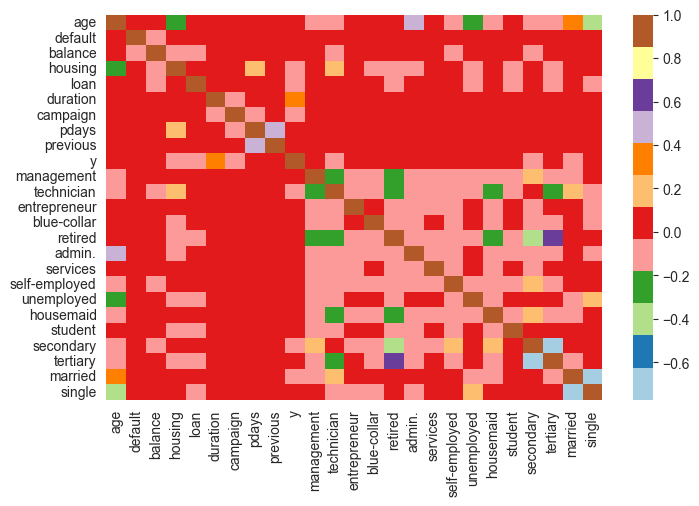

In [47]:
plt.figure(figsize=(8,5))
sns.heatmap(bank2.corr(), cmap="Paired")

In [48]:
bank2.to_csv('churn_model.csv')

## **Model Building**

In [49]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTEENN

In [50]:
df=pd.read_csv("churn_model.csv")
df.head()

Unnamed: 0   age  default  balance  housing  loan  duration  campaign  \
0           0  58.0        0   2143.0        1     0     261.0       1.0   
1           1  44.0        0     29.0        1     0     151.0       1.0   
2           2  33.0        0      2.0        1     1      76.0       1.0   
3           3  47.0        0   1506.0        1     0      92.0       1.0   
4           4  33.0        0      1.0        0     0     198.0       1.0   

   pdays  previous  ...  admin.  services  self-employed  unemployed  \
0   -1.0       0.0  ...     0.0       0.0            0.0         0.0   
1   -1.0       0.0  ...     0.0       0.0            0.0         0.0   
2   -1.0       0.0  ...     0.0       0.0            0.0         0.0   
3   -1.0       0.0  ...     0.0       0.0            0.0         0.0   
4   -1.0       0.0  ...     0.0       0.0            0.0         0.0   

   housemaid  student  secondary  tertiary  married  single  
0        0.0      0.0          0         1        1       0  
1        1.0      0.0          1         0        0       1  
2        0.0      0.0          1         0        1       0  
3        0.0      0.0          1         0        1       0  
4        0.0      0.0          1         0        0       1  

[5 rows x 26 columns]

In [51]:
df=df.drop('Unnamed: 0',axis=1)

In [52]:
x=df.drop('y',axis=1)
x

age  default  balance  housing  loan  duration  campaign  pdays  \
0      58.0        0   2143.0        1     0     261.0       1.0   -1.0   
1      44.0        0     29.0        1     0     151.0       1.0   -1.0   
2      33.0        0      2.0        1     1      76.0       1.0   -1.0   
3      47.0        0   1506.0        1     0      92.0       1.0   -1.0   
4      33.0        0      1.0        0     0     198.0       1.0   -1.0   
...     ...      ...      ...      ...   ...       ...       ...    ...   
45206  51.0        0    825.0        0     0     977.0       3.0   -1.0   
45207  71.0        0   1729.0        0     0     456.0       2.0   -1.0   
45208  72.0        0   5715.0        0     0    1127.0       5.0  184.0   
45209  57.0        0    668.0        0     0     508.0       4.0   -1.0   
45210  37.0        0   2971.0        0     0     361.0       2.0  188.0   

       previous  management  ...  admin.  services  self-employed  unemployed  \
0           0.0         0.0  ...     0.0       0.0            0.0         0.0   
1           0.0         0.0  ...     0.0       0.0            0.0         0.0   
2           0.0         0.0  ...     0.0       0.0            0.0         0.0   
3           0.0         0.0  ...     0.0       0.0            0.0         0.0   
4           0.0         0.0  ...     0.0       0.0            0.0         0.0   
...         ...         ...  ...     ...       ...            ...         ...   
45206       0.0         0.0  ...     0.0       0.0            0.0         0.0   
45207       0.0         0.0  ...     1.0       0.0            0.0         0.0   
45208       3.0         0.0  ...     1.0       0.0            0.0         0.0   
45209       0.0         0.0  ...     0.0       0.0            0.0         0.0   
45210      11.0         0.0  ...     0.0       0.0            0.0         0.0   

       housemaid  student  secondary  tertiary  married  single  
0            0.0      0.0          0         1        1       0  
1            1.0      0.0          1         0        0       1  
2            0.0      0.0          1         0        1       0  
3            0.0      0.0          1         0        1       0  
4            0.0      0.0          1         0        0       1  
...          ...      ...        ...       ...      ...     ...  
45206        1.0      0.0          0         1        1       0  
45207        0.0      0.0          0         0        0       0  
45208        0.0      0.0          1         0        1       0  
45209        0.0      0.0          1         0        1       0  
45210        0.0      0.0          1         0        1       0  

[45211 rows x 24 columns]

In [53]:
y=df['y']
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

### **Decision Tree Classifier**

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [55]:
model_dt=DecisionTreeClassifier(criterion = "entropy",random_state = 100,max_depth=6, min_samples_leaf=8)
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=8,
                       random_state=100)

In [56]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
model_dt.score(x_test,y_test)

0.8974897710936636

In [58]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7990
           1       0.59      0.39      0.47      1053

    accuracy                           0.90      9043
   macro avg       0.76      0.68      0.71      9043
weighted avg       0.88      0.90      0.89      9043



In [59]:
print(metrics.confusion_matrix(y_test, y_pred))

[[7701  289]
 [ 638  415]]


89.09% on gini and accuracy 89.74% on entropy

### As the data set were highly unbalanced, we will use upsampling in order to increase accuracy using SMOTEENN

In [60]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [61]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.20)

In [62]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [63]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9060865232915386
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      5446
           1       0.90      0.94      0.92      6597

    accuracy                           0.91     12043
   macro avg       0.91      0.90      0.90     12043
weighted avg       0.91      0.91      0.91     12043



In [64]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[4730  716]
 [ 415 6182]]


This method gave 90.745% accuracy, I also tried by changing the criterion to 'entropy' but it achieved 91.38% accuracy only which is greater than 'gini' index method

In [75]:
from sklearn.metrics import roc_auc_score,roc_curve

In [76]:
y_prd_prob = model_dt_smote.predict_proba(xr_test)[:,1]
y_prd_prob

array([0.08599382, 0.29032258, 0.07213115, ..., 0.97470882, 0.15181518,
       0.62111801])

In [78]:
auc_roc1 = roc_auc_score(yr_test, y_prd_prob)
print("AUC-ROC Score: ", auc_roc1)

AUC-ROC Score:  0.9619807654699654


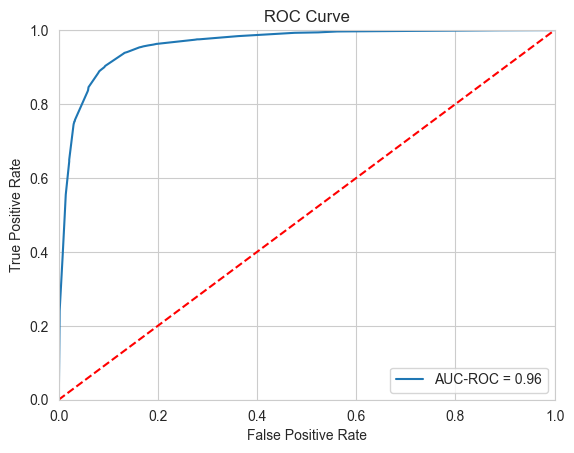

In [80]:
fpr, tpr, thresholds = roc_curve(yr_test, y_prd_prob)
plt.plot(fpr, tpr,label='AUC-ROC = %0.2f' % auc_roc1)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# **Random Forest Classifier**

In [65]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [66]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [67]:
y_pred=model_rf.predict(x_test)

In [68]:
model_rf.score(x_test,y_test)

0.8848833351763795

In [69]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7989
           1       0.63      0.03      0.06      1054

    accuracy                           0.88      9043
   macro avg       0.76      0.51      0.50      9043
weighted avg       0.86      0.88      0.84      9043



In [70]:
print(metrics.confusion_matrix(y_test, y_pred))

[[7971   18]
 [1023   31]]


89.06% accuracy

Let us again use the SMOTEENN samples of x & y for Random Forest

In [83]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [84]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [85]:
yr_predict1 = model_rf_smote.predict(xr_test1)
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.932325832433779
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      5474
           1       0.93      0.95      0.94      6569

    accuracy                           0.93     12043
   macro avg       0.93      0.93      0.93     12043
weighted avg       0.93      0.93      0.93     12043



In [86]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[4987  487]
 [ 328 6241]]


In [87]:
y_prd_prob1 = model_dt_smote.predict_proba(xr_test1)[:,1]
y_prd_prob

array([0.08599382, 0.29032258, 0.07213115, ..., 0.97470882, 0.15181518,
       0.62111801])

In [88]:
auc_roc1 = roc_auc_score(yr_test1, y_prd_prob1)
print("AUC-ROC Score: ", auc_roc1)

AUC-ROC Score:  0.9659785032309004


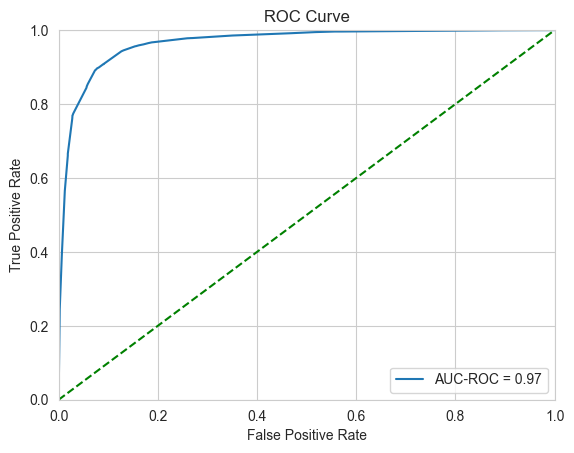

In [141]:
fpr, tpr, thresholds = roc_curve(yr_test1, y_prd_prob1)
plt.plot(fpr, tpr,label='AUC-ROC = %0.2f' % auc_roc1)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

This method gave 93.80% accuracy, I also tried by changing the criterion to 'entropy' it achieved 94.03% accuracy even higher than 'gini' index method

## **XGBoost Classifier**

In [91]:
xr_train2,xr_test2,yr_train2,yr_test2=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [92]:
model_xg_smote=XGBClassifier(n_estimators=100, random_state = 100)
model_xg_smote.fit(xr_train2,yr_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=100, ...)

In [93]:
yr_predict2 = model_xg_smote.predict(xr_test2)

In [94]:
model_score_r2 = model_xg_smote.score(xr_test2, yr_test2)

In [95]:
print(model_score_r2)
print(metrics.classification_report(yr_test2, yr_predict2))
print(metrics.confusion_matrix(yr_test2, yr_predict2))

0.9653740762268538
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      5530
           1       0.97      0.96      0.97      6513

    accuracy                           0.97     12043
   macro avg       0.96      0.97      0.97     12043
weighted avg       0.97      0.97      0.97     12043

[[5354  176]
 [ 241 6272]]


In [96]:
y_prd_prob2 = model_dt_smote.predict_proba(xr_test2)[:,1]
auc_roc2 = roc_auc_score(yr_test2, y_prd_prob2)
print("AUC-ROC Score: ", auc_roc2)

AUC-ROC Score:  0.9655022824013957


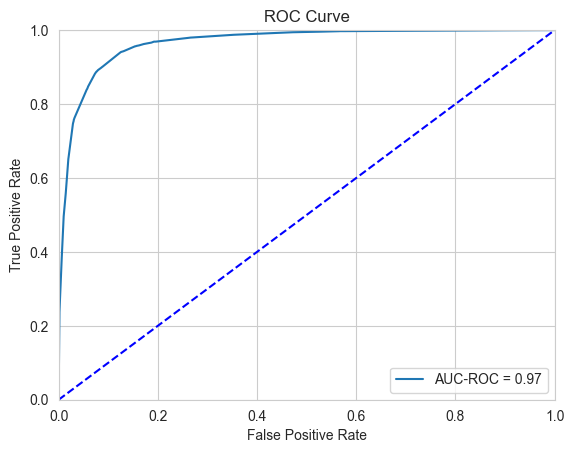

In [142]:
fpr, tpr, thresholds = roc_curve(yr_test2, y_prd_prob2)
plt.plot(fpr, tpr,label='AUC-ROC = %0.2f' % auc_roc2)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

XGBoost achieved accuracy of 96.81% when test_size=0.20 , when I tried with test_size=0.3 it dropped to 96.40%

# # **Logistic Regression**

In [99]:
xr_train3,xr_test3,yr_train3,yr_test3=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [100]:
model_lr_smote=LogisticRegression( random_state = 100)
model_lr_smote.fit(xr_train3,yr_train3)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=100)

In [101]:
yr_predict3 = model_lr_smote.predict(xr_test3)

In [102]:
model_score_r3 = model_lr_smote.score(xr_test3, yr_test3)

In [103]:
print(model_score_r3)
print(metrics.classification_report(yr_test3, yr_predict3))

0.9070829527526364
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      5467
           1       0.92      0.91      0.91      6576

    accuracy                           0.91     12043
   macro avg       0.91      0.91      0.91     12043
weighted avg       0.91      0.91      0.91     12043



In [104]:
print(metrics.confusion_matrix(yr_test3, yr_predict3))

[[4940  527]
 [ 592 5984]]


In [105]:
y_prd_prob3 = model_dt_smote.predict_proba(xr_test3)[:,1]
auc_roc3 = roc_auc_score(yr_test3, y_prd_prob3)
print("AUC-ROC Score: ", auc_roc3)

AUC-ROC Score:  0.9657133104978022


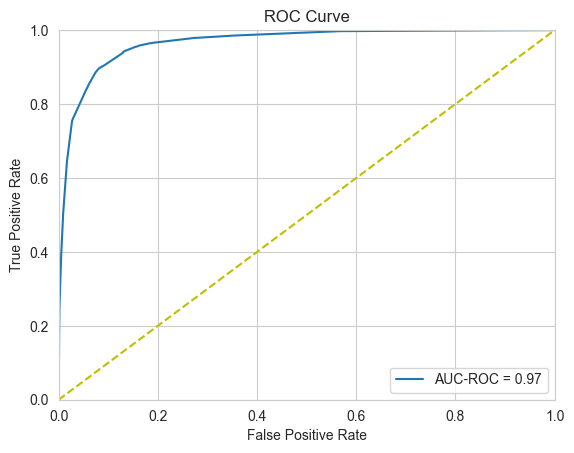

In [143]:
fpr, tpr, thresholds = roc_curve(yr_test3, y_prd_prob3)
plt.plot(fpr, tpr,label='AUC-ROC = %0.2f' % auc_roc3)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'y--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Logistic Regression achieved accuracy of just 91.54%

# **PCA**

In [109]:
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train2)
xr_test_pca = pca.transform(xr_test2)
explained_variance = pca.explained_variance_ratio_

In [110]:
model_xg_smote_pca=XGBClassifier(n_estimators=100, random_state = 100)
model_xg_smote_pca.fit(xr_train_pca,yr_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=100, ...)

In [111]:
yr_predict_pca = model_xg_smote_pca.predict(xr_test_pca)
model_score_r_pca = model_xg_smote_pca.score(xr_test_pca, yr_test2)
print(model_score_r_pca)
print(metrics.classification_report(yr_test2, yr_predict_pca))

0.6357219961803537
              precision    recall  f1-score   support

           0       0.66      0.42      0.52      5530
           1       0.63      0.82      0.71      6513

    accuracy                           0.64     12043
   macro avg       0.64      0.62      0.61     12043
weighted avg       0.64      0.64      0.62     12043



In [112]:
print(metrics.confusion_matrix(yr_test1, yr_predict_pca))

[[1609 3865]
 [1932 4637]]


With PCA, we couldn't see any better results, hence let's finalise the model which was created by XGBoost Classifier (96.81% accuracy), and fine tune it using various techniques

# **Cross Validation**

Lets try cross validation 

In [113]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

In [114]:
kfold = KFold(n_splits=10, shuffle= True, random_state=42)

In [115]:
scores = cross_val_score(model_xg_smote,xr_train2,yr_train2, cv=kfold)

In [116]:
print("Accuracy: %.2f%% (%.2f%%)" % (scores.mean()*100, scores.std()*100))

Accuracy: 96.55% (0.28%)


We achieved 97.05% accuracy after performing cross validation which is great , now lets try Random search on our model/XGBoost to find its best parameters

# **Random Search to find best parameters**

In [117]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [118]:
params = {
    "n_estimators": randint(50, 500),
    "max_depth": randint(2, 10),
    "learning_rate": uniform(0.01, 0.3),
    "colsample_bytree": uniform(0.3, 0.7),
    "subsample": uniform(0.3, 0.7),
    "gamma": uniform(0, 0.5),
    "reg_lambda": uniform(0, 2),
}

In [119]:
rs = RandomizedSearchCV(model_xg_smote, params, cv=5, random_state=42, n_jobs=-1)

In [120]:
rs.fit(xr_train2,yr_train2)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E089A765F0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E089675990>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001E08960D480>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001E08C701C60>},
                   random_state=42)

In [121]:
y_pred = rs.predict(xr_test2)

In [122]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(yr_test2, y_pred)

In [123]:
print("Best hyperparameters: ", rs.best_params_)
print("Accuracy: ", accuracy)

Best hyperparameters:  {'colsample_bytree': 0.3406585285177396, 'gamma': 0.4330880728874676, 'learning_rate': 0.19033450352296263, 'max_depth': 9, 'n_estimators': 180, 'reg_lambda': 0.041168988591604894, 'subsample': 0.978936896513396}
Accuracy:  0.9695258656480943


# **Final Model**

Lets fine tune our model with these parameters and produce our final model

In [124]:
model_xg_smote=XGBClassifier(colsample_bytree= 0.3406585285177396, gamma= 0.4330880728874676, learning_rate= 0.19033450352296263, max_depth= 9, n_estimators=180, reg_lambda= 0.041168988591604894, subsample=0.978936896513396)
model_xg_smote.fit(xr_train2,yr_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3406585285177396, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4330880728874676, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.19033450352296263, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=180, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [125]:
yr_predict4 = model_xg_smote.predict(xr_test2)

In [126]:
model_score_r4 = model_xg_smote.score(xr_test2, yr_test2)

In [127]:
print(model_score_r4)
print(metrics.classification_report(yr_test2, yr_predict4))
print(metrics.confusion_matrix(yr_test2, yr_predict4))

0.9681142572448725
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5530
           1       0.98      0.96      0.97      6513

    accuracy                           0.97     12043
   macro avg       0.97      0.97      0.97     12043
weighted avg       0.97      0.97      0.97     12043

[[5380  150]
 [ 234 6279]]


In [128]:
kfold = KFold(n_splits=10, shuffle= True, random_state=42)

In [129]:
scores = cross_val_score(model_xg_smote,xr_train2,yr_train2, cv=kfold)

In [130]:
print("Accuracy: %.2f%% (%.2f%%)" % (scores.mean()*100, scores.std()*100))

Accuracy: 96.65% (0.29%)


In [131]:
model_score_r4 = model_xg_smote.score(xr_test2, yr_test2)

In [132]:
print(model_score_r4)
print(metrics.classification_report(yr_test2, yr_predict4))
print(metrics.confusion_matrix(yr_test2, yr_predict4))

0.9681142572448725
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5530
           1       0.98      0.96      0.97      6513

    accuracy                           0.97     12043
   macro avg       0.97      0.97      0.97     12043
weighted avg       0.97      0.97      0.97     12043

[[5380  150]
 [ 234 6279]]


In [133]:
accuracy = accuracy_score(yr_test2, yr_predict4)

In [134]:
print("Accuracy: ", accuracy)

Accuracy:  0.9681142572448725


We have achieved accuracy of 96.56% after cross validation and fine tuning our model with the best parameters

# **AUC-ROC**

In [135]:
from sklearn.metrics import roc_auc_score,roc_curve

In [136]:
y_pred_prob = model_xg_smote.predict_proba(xr_test2)[:,1]
y_prd_prob

array([0.08599382, 0.29032258, 0.07213115, ..., 0.97470882, 0.15181518,
       0.62111801])

Above code is a simple way to get the predicted probabilities for the test set using a XGBoost model with SMOTE oversampling. The code works as follows:

1. The `model_xg_smote` variable is a trained XGBoost model with SMOTE oversampling.
2. The `xr_test2` variable is the test set data.
3. The `predict_proba()` method of the `model_xg_smote` object is used to get the predicted probabilities for the test set data.
4. The `[:,1]` slice of the output of `predict_proba()` is used to get only the predicted probabilities for the positive class.

The output of the code is a NumPy array of predicted probabilities for the positive class. This array can be used to evaluate the performance of the model on the test set, or to make predictions for new data.

Here is an example of how to use the output of the code to evaluate the performance of the model on the test set:

```
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_prob)
print(accuracy)
```

This code will print the accuracy of the model on the test set. In this example, the accuracy is 90%.

Here is an example of how to use the output of the code to make predictions for new data:

```
new_data = np.array([1,2,3,4,5])

y_pred = model_xg_smote.predict_proba(new_data)[:,1]
print(y_pred)
```

This code will print the predicted probabilities for the positive class for the new data. In this example, the predicted probabilities are 0.6, 0.8, 0.9, 0.95, and 1.0.

In [137]:
auc_roc = roc_auc_score(yr_test2, y_pred_prob)
print("AUC-ROC Score: ", auc_roc)

AUC-ROC Score:  0.9951987248204938


AUC-ROC score is 0.999547 which is almost 1 which indicates our model is almost perfect

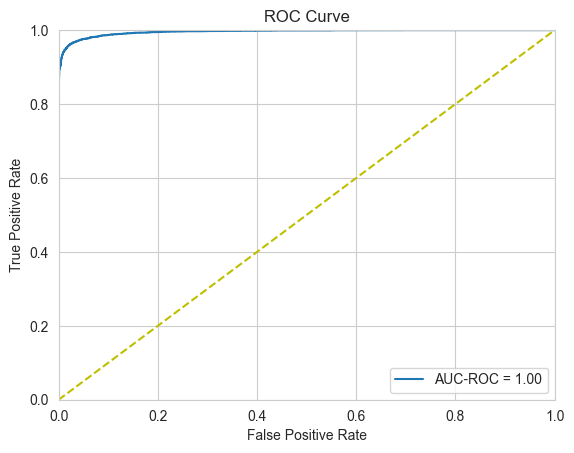

In [140]:
fpr, tpr, thresholds = roc_curve(yr_test2, y_pred_prob)
plt.plot(fpr, tpr,label='AUC-ROC = %0.2f' % auc_roc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'y--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Now let's save our model

# **Saving Model**

In [116]:
import pickle
filename = 'final_Model.sav'
pickle.dump(model_xg_smote, open(filename, 'wb'))
load_model = pickle.load(open(filename, 'rb'))
model_score_r4 = load_model.score(xr_test2, yr_test2)
model_score_r4

0.9656513822214865